In [7]:
from knn import KNN
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score
from random import choice

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
digit = load_digits(n_class=5)
X_train, X_test, y_train, y_test = train_test_split(digit.data, digit.target, test_size=.8)

In [10]:
X_train.shape

(180, 64)

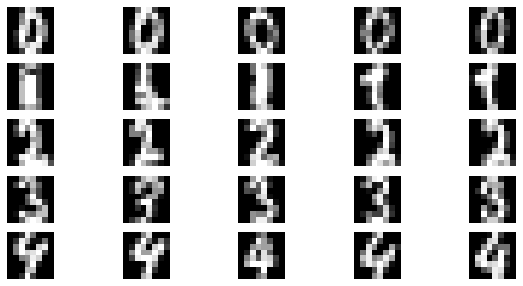

In [11]:
# Display random images splitted by class
samples_per_class = 5
unique_classes = len(np.unique(y_train))

fig, axes = plt.subplots(unique_classes, samples_per_class, figsize=(10, 5))

for i_class in range(unique_classes):
    for sample in range(samples_per_class):
        image = choice(X_train[y_train == i_class])
        axes[i_class, sample].imshow(image.reshape(8, 8), cmap='gray')
        # axes[i_class, sample].set_title(i_class)
        axes[i_class, sample].axis('off')

### Euclidean Distance:
$d(p,q) = \sqrt{\sum_{i=1}^{n} (p_{i} - q_{i})^2}$
### Manhattan Distance
$d(p,q) = {\sum_{i=1}^{n} |p_{i} - q_{i}|}$
### Cosine Distance
$d(p,q) = 1 - \frac {p \cdot q} {||p||_2||q||_2}$

In [12]:
from knn import euclidean_distance, manhattan_distance, cosine_distance
from numpy.linalg import norm 
from scipy.spatial.distance import cityblock, cosine

# Checking the euclidean_distance
euclid = euclidean_distance(X_train, X_test)
assert np.isclose(euclid[0, 13], norm(X_test[0] - X_train[13]))

# Checking the manhattan_distance
manhattan = manhattan_distance(X_train, X_test)
assert np.isclose(manhattan[0, 13], cityblock(X_test[0], X_train[13]))

# Checking the cosine_distance
cos_dist = cosine_distance(X_train, X_test)
assert np.isclose(cos_dist[0, 13], cosine(X_test[0], X_train[13]))